## Titanic exploratory analysis

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data

In [117]:
titanic = pd.read_csv("Data\Titanic.csv")

### Review data

In [118]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Data cleaning

In [120]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

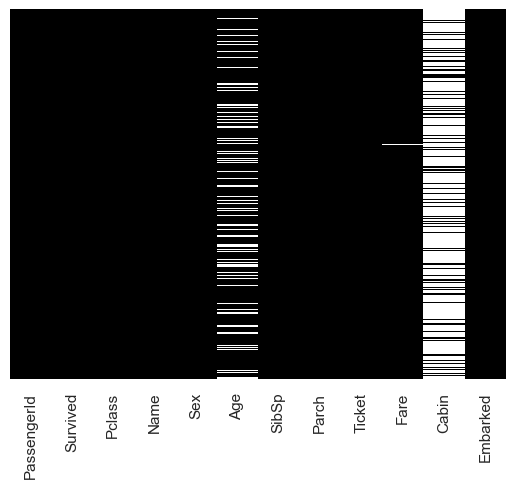

In [121]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="cubehelix")

Large amount of null values for cabin. Around 20% of missing age values and a small amount of nulls for fare.

In [122]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

filled the null value of 'Age' with the mean of the other ages

In [123]:
titanic.drop(columns='Cabin', inplace=True)
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Removed the cabin column as to many null values

In [124]:
titanic[titanic['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [125]:
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [126]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Investigate data

#### Survived

In [127]:
survived = titanic["Survived"].value_counts()
print(survived)

Survived
0    266
1    152
Name: count, dtype: int64


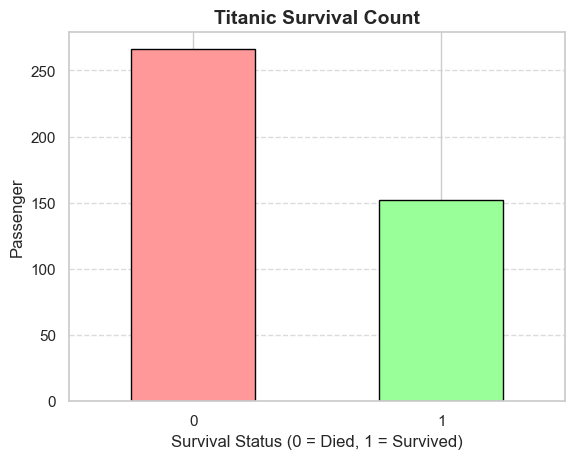

In [128]:
# plotting survival count

sns.set_theme(style="whitegrid")
colors = sns.color_palette(["#FF9999", "#99FF99"])
ax = survived.plot(kind="bar", color=colors, edgecolor='black')

plt.title("Titanic Survival Count", fontsize=14, fontweight='bold')
plt.xlabel("Survival Status (0 = Died, 1 = Survived)", fontsize=12)
plt.ylabel("Passenger", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [129]:
# Survival percetage

survival_rate = (titanic['Survived'].sum() / len(titanic)) * 100
death_rate = (titanic["Survived"].value_counts()[0] / len(titanic)) * 100

print(f"Death Rate: {death_rate:.2f}%")
print(f"Survival Rate: {survival_rate:.2f}%")

Death Rate: 63.64%
Survival Rate: 36.36%


The survival rate for the Titanic is low at a 36.5% rate for survival

#### Pclass

In [130]:
pclass = titanic["Pclass"].value_counts()
print(pclass)

Pclass
3    218
1    107
2     93
Name: count, dtype: int64


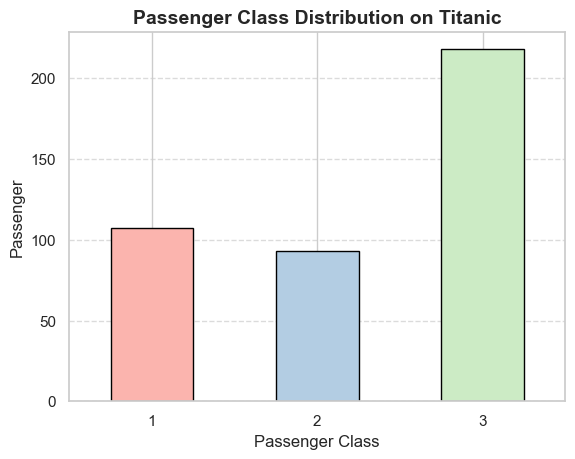

In [131]:
# plotting passenger class distribution

pclass_counts = titanic["Pclass"].value_counts().sort_index()  # Sorting for better order

sns.set_theme(style="whitegrid")

colors = sns.color_palette("Pastel1", n_colors=len(pclass_counts))
ax = pclass_counts.plot(kind="bar", color=colors, edgecolor='black')

plt.title("Passenger Class Distribution on Titanic", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Passenger", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


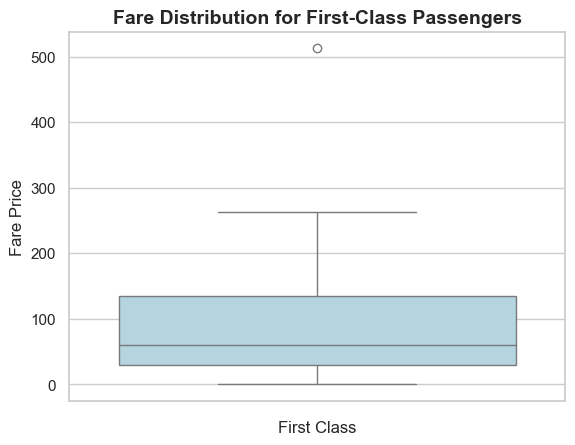

In [132]:
# plotting first class distribution

first_class = titanic[titanic["Pclass"] == 1]

sns.set_theme(style="whitegrid")
sns.boxplot(y=first_class["Fare"], color="lightblue")

plt.title("Fare Distribution for First-Class Passengers", fontsize=14, fontweight='bold')
plt.ylabel("Fare Price", fontsize=12)
plt.xlabel("First Class", fontsize=12)

plt.show()


Majority of passengers were in 3rd class however 1st class had a higher passenger count that 2nd

#### Sex

In [133]:
gender = titanic["Sex"].value_counts()
print(gender)

Sex
male      266
female    152
Name: count, dtype: int64


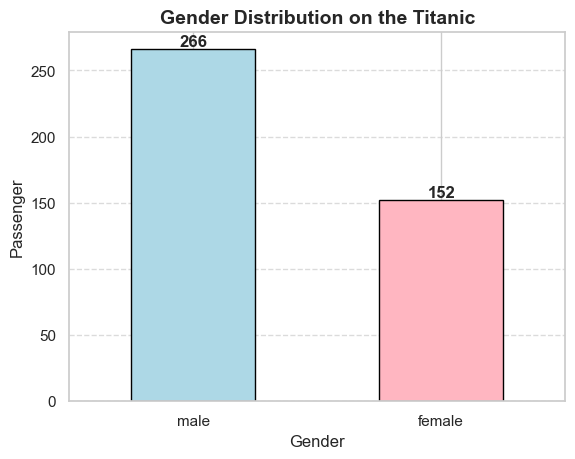

In [134]:
# plot gender distribution

sns.set_theme(style="whitegrid")
colors = ["lightblue", "lightpink"]
ax = gender.plot(kind="bar", color=colors, edgecolor='black')

plt.title("Gender Distribution on the Titanic", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Passenger", fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [135]:
survival_rate = (titanic['Survived'].sum() / len(titanic)) * 100
death_rate = (titanic["Survived"].value_counts()[0] / len(titanic)) * 100

print(f"Death Rate: {death_rate:.2f}%")
print(f"Survival Rate: {survival_rate:.2f}%")

Death Rate: 63.64%
Survival Rate: 36.36%


In [136]:
# Male and Female percentages

gender_counts = titanic["Sex"].value_counts(normalize=True) * 100

female_percentage = gender_counts.get("female", 0)
male_percentage = gender_counts.get("male", 0)

print(f"Female Percentage: {female_percentage:.2f}%")
print(f"Male Percentage: {male_percentage:.2f}%")

Female Percentage: 36.36%
Male Percentage: 63.64%


There was more males than females on the Titanic with almost twice the amount of males to females

#### Age

In [137]:
age = titanic["Age"]
pd.DataFrame(age.describe())

,Age
count,418.000000
mean,29.599282
std,12.703770
min,0.170000
25%,23.000000
50%,27.000000
75%,35.750000
max,76.000000


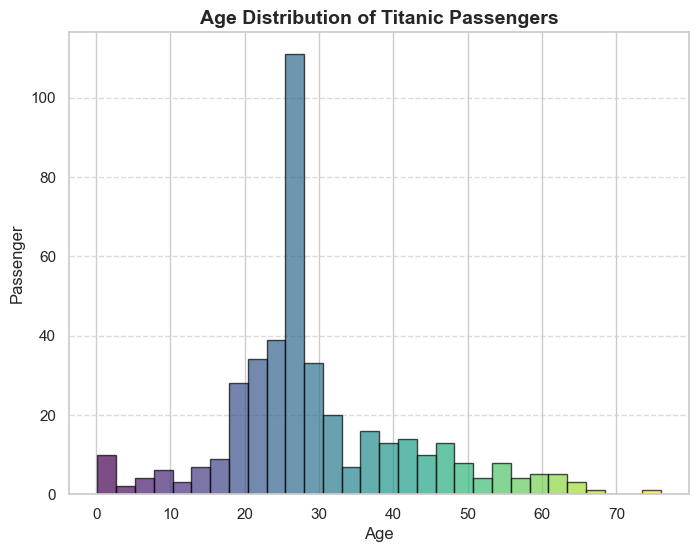

In [163]:
# plotting age distribution

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
bins = 30
colors = plt.cm.viridis(np.linspace(0, 1, bins))
n, bins, patches = plt.hist(age, bins=bins, edgecolor="black", alpha=0.7)

for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.title("Age Distribution of Titanic Passengers", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Passenger", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


The median age for passengers on the titantic is 29. It is also interesting to note the large amount of children under the age of 5 on the boat

#### SibSp

In [139]:
sibsp = titanic["SibSp"].value_counts()
pd.DataFrame(sibsp)

,count
SibSp,
0,283
1,110
2,14
3,4
4,4
8,2
5,1


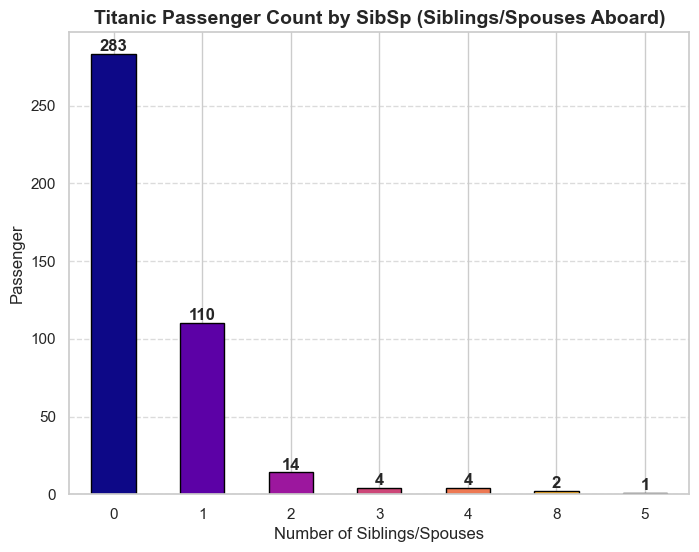

In [140]:
# plotting sibsp distribution

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

colors = plt.cm.plasma(np.linspace(0, 1, len(sibsp)))
ax = sibsp.plot(kind="bar", color=colors, edgecolor="black")

plt.title("Titanic Passenger Count by SibSp (Siblings/Spouses Aboard)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Siblings/Spouses", fontsize=12)
plt.ylabel("Passenger", fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


#### Parch

In [141]:
parch = titanic["Parch"].value_counts()
pd.DataFrame(parch)

,count
Parch,
0,324
1,52
2,33
3,3
4,2
9,2
6,1
5,1


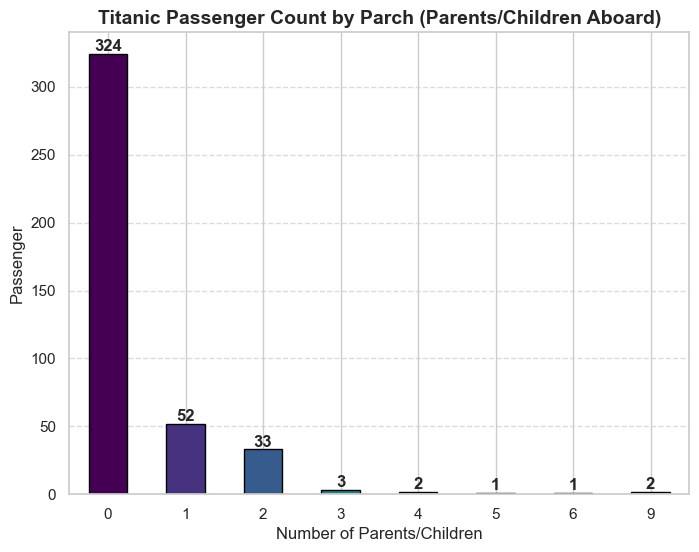

In [142]:
# plotting parch distribution

sns.set_theme(style="whitegrid")
parch_counts = titanic["Parch"].value_counts().sort_index()

plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(parch_counts)))
ax = parch_counts.plot(kind="bar", color=colors, edgecolor="black")

plt.title("Titanic Passenger Count by Parch (Parents/Children Aboard)", fontsize=14, fontweight='bold')
plt.xlabel("Number of Parents/Children", fontsize=12)
plt.ylabel("Passenger", fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Fare

In [144]:
fare = titanic['Fare']
pd.DataFrame(fare.describe())

,Fare
count,418.000000
mean,35.576535
std,55.850103
min,0.000000
25%,7.895800
50%,14.454200
75%,31.471875
max,512.329200


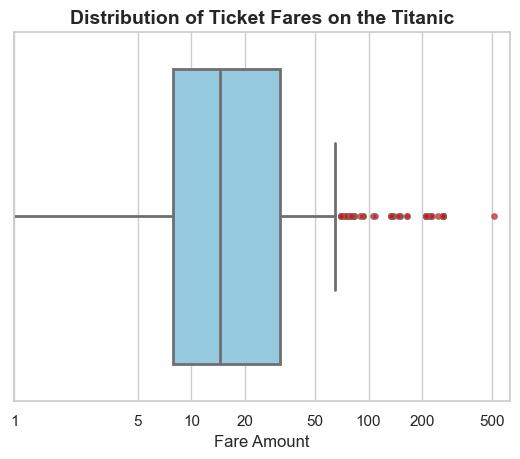

In [160]:
# plotting fare distribution

sns.set_theme(style="whitegrid")

sns.boxplot(x=titanic["Fare"], color="skyblue", linewidth=2, fliersize=4, flierprops={"marker": "o", "markerfacecolor": "red", "alpha": 0.7})
plt.title("Distribution of Ticket Fares on the Titanic", fontsize=14, fontweight='bold')
plt.xlabel("Fare Amount", fontsize=12)
plt.xscale("log")

tick_positions = [1, 5, 10, 20, 50, 100, 200, 500]
tick_labels = [f"{int(t)}" for t in tick_positions]
plt.xticks(tick_positions, tick_labels)

plt.show()

It is interesting to note the outliers in fares of passengers who paid a much higher fare than other passengers. 

#### Embarked

In [152]:
embarked = titanic["Embarked"]
pd.DataFrame(embarked)

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


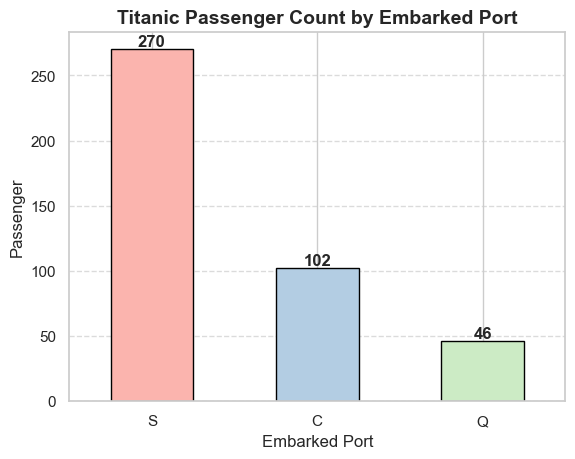

In [162]:
# plotting embarked distribution

sns.set_theme(style="whitegrid")

embarked_counts = titanic["Embarked"].value_counts()

colors = sns.color_palette("Pastel1", n_colors=len(embarked_counts))
ax = embarked_counts.plot(kind="bar", color=colors, edgecolor="black")

plt.title("Titanic Passenger Count by Embarked Port", fontsize=14, fontweight='bold')
plt.xlabel("Embarked Port", fontsize=12)
plt.ylabel("Passenger", fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Most of the passengers embarked from 'Southampton'